In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [6]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f709881fcf6aa81a4a3c515ca92129c4ab1ea2c314a3158cd243ab8812201bd2
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/ch04") #디렉토리 지정하기 거기서 파일 가져오는 거고
from gradient_2d import numerical_gradient

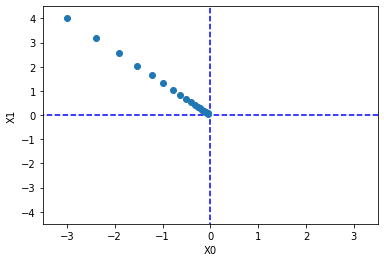

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    


lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)


plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [3]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/common")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [4]:
class simpleNet: #웨이트 초기설정, 예측값, 크로스엔트로피 이용한 손실함수 설정
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [10]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

def numerical_gradient(f, x): #미분값 하나하나
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) #(N,p) 형태의 배열에서 원소 하나씩 살피고 싶을 때
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [9]:
A = np.array([[10,20,30,40],[50,60,70,80]])

print(A) #[[10,20,30,40],[50,60,70,80]]
print(A.shape) #(2,4)

it = np.nditer(A, flags=['multi_index'], op_flags=['readwrite'])

while not it.finished: #이터레이터가 finished 위치가 아닐동안 반복
    idx = it.multi_index
    print(A[idx]) #10부터 80까지 차례로 하나씩 출력
    it.iternext() #이터레이터를 다음 위치로 넘기기

[[10 20 30 40]
 [50 60 70 80]]
(2, 4)
10
20
30
40
50
60
70
80


In [19]:
print("W:\n",net.W)

x=np.array([0.6,0.9])
p=net.predict(x)
print("p:\n",p)
np.argmax(p)
t=np.array([0,0,1])

def f(W):
  return net.loss(x,t)

dW=numerical_gradient(f,net.W)
print("dW:\n",dW)

W:
 [[ 0.66245924  0.81532432  0.67622728]
 [-0.14444686  0.60382736  0.12752819]]
p:
 [0.26747337 1.03263921 0.52051174]
dW:
 [[ 0.13521782  0.29063053 -0.42584834]
 [ 0.20282673  0.43594579 -0.63877252]]
